In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import numpy as np
import matplotlib.pyplot as plt
#from sqlalchemy import create_engine

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
# connect to "Dataset" DB 
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"FinalData\" ", con=conn)
pd.set_option('display.max_column',50)
df.head()

,index,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,Ireland,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3733,3,1,261,0,0,0,0,-68.0,0,0,2,3,3,9.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,6516,0,0,269,0,1,0,1,-52.0,0,0,2,0,3,8.0,60,256.0,862.0,1347.0,2066.0,513.0,719.0,1040.0,1875.0,307.0,2791.0,56.400000
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,261,0,0,0,0,-137.0,0,0,2,2,3,3.0,90,81.0,446.0,565.0,565.0,119.0,0.0,525.0,565.0,40.0,646.0,58.166667
3,3,0,0,1,0,0,0,0,0,0,0,0,0,0,8462,3,1,262,0,1,1,0,-38.0,0,0,2,2,3,3.0,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,11391,0,0,268,0,0,0,1,-159.0,0,0,2,1,3,9.0,240,98.0,447.0,612.0,650.0,165.0,38.0,489.0,615.0,123.0,934.0,81.600000


## Random Forest Model for Year 2013 STEM Class

In [4]:
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
tempDf = df[['year','term','module_domain','code_module','region',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
tempDf = tempDf.loc[(tempDf.year == 0)&(tempDf.module_domain==1)]
# Show first 20 observations of the dataset
tempDf.head(20)

,year,term,module_domain,code_module,region,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,58.166667,-137.0,2,261,0,0,3,3.0,90
9,0,1,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-128.0,0,240,0,0,2,4.0,90
21,0,0,1,5,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,111.0,367.0,14.666667,-47.0,1,268,2,0,3,8.0,60
26,0,0,1,4,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.000000,-61.0,1,268,0,0,1,0.0,30
29,0,0,1,3,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8.0,347.0,35.250000,-74.0,0,261,0,0,1,6.0,60
37,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,64.0,728.0,74.958333,-134.0,0,261,0,0,1,3.0,60
38,0,0,1,3,10,0,0,0,0,0,0,0,0,0,0,1,0,1,0,24.0,305.0,52.166667,-190.0,1,261,0,0,3,1.0,70
49,0,0,1,5,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,146.0,4595.0,94.333333,-31.0,0,268,0,1,1,4.0,60
51,0,0,1,3,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,61.0,265.0,75.416667,-96.0,0,261,0,1,2,8.0,60


In [5]:
# drop missing values
tempDf=tempDf.dropna()
tempDf.count()

year                          7786
term                          7786
module_domain                 7786
code_module                   7786
region                        7786
Scotland                      7786
East Anglian Region           7786
London Region                 7786
South Region                  7786
North Western Region          7786
West Midlands Region          7786
South West Region             7786
East Midlands Region          7786
South East Region             7786
Wales                         7786
Yorkshire Region              7786
North Region                  7786
gender                        7786
disability                    7786
b4_sum_clicks                 7786
half_sum_clicks               7786
std_half_score                7786
date_registration             7786
age_band                      7786
module_presentation_length    7786
num_of_prev_attempts          7786
final_result                  7786
highest_education             7786
imd_band            

In [6]:
X=tempDf[['region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts',
          'highest_education','imd_band','studied_credits']]
y=tempDf['final_result']

# Feature Selection using Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
## SelectFromModel will select those features which importance is greater 
## than the mean importance of all the features by default

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [9]:
sel.get_support()
# It will return an array of boolean values. 
# True for the features whose importance is greater than the mean importance and False for the rest.

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False])

In [10]:
# We can now make a list and count the selected features.
# It will return an Integer representing the number of features selected by the random forest.
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [11]:
# Get the name of the features selected
print(selected_feat)

Index(['b4_sum_clicks', 'half_sum_clicks', 'std_half_score'], dtype='object')


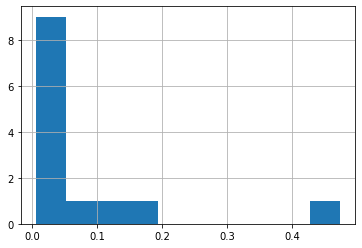

In [12]:
# check and plot the distribution of importance.
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [13]:
# After dropping those missing values, we have 7786 observatios for the dataset
# Define our predictors
X=tempDf[['b4_sum_clicks','half_sum_clicks','std_half_score']]
y=tempDf['final_result']

In [14]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [17]:
print(X.columns,regressor.feature_importances_)

Index(['b4_sum_clicks', 'half_sum_clicks', 'std_half_score'], dtype='object') [0.16602477 0.30392527 0.53004996]


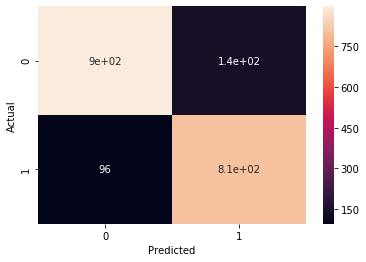

In [18]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [19]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8772470467385721


In [20]:
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
tempDf2 = df[['year','term','module_domain','code_module','region','Scotland','East Anglian Region','London Region',
              'South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region',
              'South East Region','Wales','Yorkshire Region','North Region','gender','disability',
              'b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
              'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
              'imd_band','studied_credits']]
tempDf2 = tempDf2.loc[(tempDf2.year ==1)&(tempDf2.module_domain==1)]
# Show first 5 observations of the dataset
tempDf2.head(5)

,year,term,module_domain,code_module,region,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
3,1,0,1,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-38.0,2,262,1,0,3,3.0,60
7,1,0,1,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,181.0,475.0,74.325000,-110.0,0,269,0,1,2,5.0,120
10,1,1,1,3,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3.0,1069.0,57.333333,-54.0,0,241,1,1,2,4.0,60
13,1,1,1,4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,51.0,757.0,84.555556,-47.0,0,241,0,1,3,9.0,60
14,1,0,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,201.0,796.0,3.900000,-114.0,0,269,0,0,3,4.0,60


In [21]:
tempDf2=tempDf2.dropna()

In [22]:
# df2 = pd.DataFrame(tempDf2,columns= ['b4_sum_clicks','std_half_score','half_sum_clicks'])

In [23]:
df2 = pd.DataFrame(tempDf2,columns= ['b4_sum_clicks','half_sum_clicks','std_half_score'])

In [24]:
X=tempDf[['b4_sum_clicks','half_sum_clicks','std_half_score']]
# X=tempDf[['b4_sum_clicks','std_half_score','half_sum_clicks']]
y=tempDf['final_result']
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Start Random forest Modelling
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_new = regressor.predict(df2)
y_test_new=tempDf2['final_result']

In [25]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new, y_pred_new))

Accuracy:  0.6646234676007006


## Random Forest for 2013 Social Science Class

In [26]:
## Create a temporary data frame for Year 2013 Term J and Term B Social Science class
## Create a temporary data frame for Year 2013 Term J and Term B STEM class
SStempDf = df[['year','term','module_domain','code_module','region',
             'Scotland','East Anglian Region','London Region','South Region','North Western Region','West Midlands Region',
             'South West Region','East Midlands Region','South East Region','Wales','Yorkshire Region','North Region',
             'gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
             'module_presentation_length','num_of_prev_attempts','final_result','highest_education','imd_band','studied_credits']]
SStempDf = SStempDf.loc[(SStempDf.year == 0)&(SStempDf.module_domain==0)]
# Show first 5 observations of the dataset
SStempDf.head(5)

,year,term,module_domain,code_module,region,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,98.0,612.0,81.600000,-159.0,2,268,0,1,3,9.0,240
5,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14.0,147.0,38.813953,-47.0,0,240,2,0,1,2.0,60
6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-194.0,0,268,0,0,2,4.0,60
8,0,0,0,1,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,6.0,365.0,89.612903,-27.0,0,268,0,1,2,5.0,60
12,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,5.0,1465.0,63.000000,-73.0,0,240,0,1,1,2.0,120


In [27]:
X=SStempDf[['region','Scotland','East Anglian Region','London Region','South Region',
          'North Western Region','West Midlands Region','South West Region','East Midlands Region',
          'South East Region','Wales','Yorkshire Region','North Region','gender','disability','b4_sum_clicks',
          'half_sum_clicks','std_half_score','date_registration','age_band','module_presentation_length',
          'num_of_prev_attempts','highest_education','imd_band','studied_credits']]
y=SStempDf['final_result']

In [28]:
## Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [29]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [30]:
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False,  True, False])

In [31]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [32]:
print(selected_feat)

Index(['b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'imd_band'],
      dtype='object')


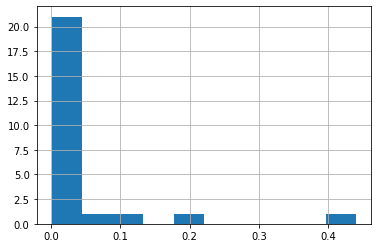

In [33]:
# check and plot the distribution of importance.
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()

In [34]:
# Let's start our modeling
X=SStempDf[['b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','imd_band']]
y=SStempDf['final_result']

In [35]:
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [38]:
print(X.columns,regressor.feature_importances_)

Index(['b4_sum_clicks', 'half_sum_clicks', 'std_half_score',
       'date_registration', 'imd_band'],
      dtype='object') [0.11030405 0.21815125 0.5401112  0.08497073 0.04646277]


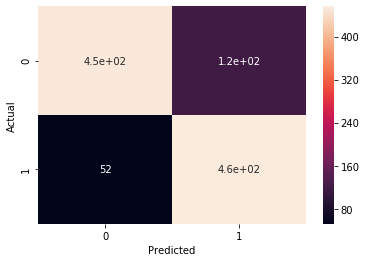

In [39]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [40]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.840258541089566


In [41]:
## Let's predict 2014 Socical Science Results
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
SStempDf2 = df[['year','term','module_domain','code_module','region','Scotland','East Anglian Region','London Region',
              'South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region',
              'South East Region','Wales','Yorkshire Region','North Region','gender','disability',
              'b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
              'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
              'imd_band','studied_credits']]
SStempDf2 = SStempDf2.loc[(SStempDf2.year ==1)&(SStempDf2.module_domain==0)]
# Show first 5 observations of the dataset
SStempDf2.head(5)

,year,term,module_domain,code_module,region,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,256.0,1347.0,56.400000,-52.0,2,269,0,1,3,8.0,60
11,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,30.0,217.0,44.200000,-18.0,0,269,0,1,1,6.0,60
17,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-156.0,0,234,1,0,1,2.0,120
18,1,1,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0,13.0,32.883721,-139.0,0,234,2,0,2,2.0,60
19,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,241.0,1408.0,84.600000,-38.0,1,269,0,1,2,6.0,60


In [42]:
SStempDf2=SStempDf2.dropna()
df2 = pd.DataFrame(SStempDf2,columns= ['b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','imd_band'])

In [43]:
X=SStempDf[['b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','imd_band']]
y=SStempDf['final_result']
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Start Random forest Modelling
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_new = regressor.predict(df2)
y_test_new=SStempDf2['final_result']

In [44]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test_new,y_pred_new))

Accuracy:  0.6952718676122931


## Combine STEM and Social Science Together

In [45]:
ComtempDf = df[['year','term','module_domain','code_module','region','Scotland','East Anglian Region','London Region',
              'South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region',
              'South East Region','Wales','Yorkshire Region','North Region','gender','disability',
              'b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
              'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
              'imd_band','studied_credits']]
ComtempDf = ComtempDf.loc[(ComtempDf.year ==0)]
# Show first 5 observations of the dataset
ComtempDf.head(5)

,year,term,module_domain,code_module,region,Scotland,East Anglian Region,London Region,South Region,North Western Region,West Midlands Region,South West Region,East Midlands Region,South East Region,Wales,Yorkshire Region,North Region,gender,disability,b4_sum_clicks,half_sum_clicks,std_half_score,date_registration,age_band,module_presentation_length,num_of_prev_attempts,final_result,highest_education,imd_band,studied_credits
0,0,0,1,3,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000000,-68.0,2,261,0,0,3,9.0,60
2,0,0,1,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,81.0,565.0,58.166667,-137.0,2,261,0,0,3,3.0,90
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,98.0,612.0,81.600000,-159.0,2,268,0,1,3,9.0,240
5,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,14.0,147.0,38.813953,-47.0,0,240,2,0,1,2.0,60
6,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.000000,-194.0,0,268,0,0,2,4.0,60


In [46]:
ComtempDf.count()

year                          12118
term                          12118
module_domain                 12118
code_module                   12118
region                        12118
Scotland                      12118
East Anglian Region           12118
London Region                 12118
South Region                  12118
North Western Region          12118
West Midlands Region          12118
South West Region             12118
East Midlands Region          12118
South East Region             12118
Wales                         12118
Yorkshire Region              12118
North Region                  12118
gender                        12118
disability                    12118
b4_sum_clicks                 12118
half_sum_clicks               12118
std_half_score                12118
date_registration             12118
age_band                      12118
module_presentation_length    12118
num_of_prev_attempts          12118
final_result                  12118
highest_education           

In [47]:
X=ComtempDf[['term','region','gender','disability','b4_sum_clicks','half_sum_clicks','std_half_score',
          'date_registration','age_band','module_presentation_length','num_of_prev_attempts',
          'highest_education','imd_band','studied_credits']]
y=ComtempDf['final_result']

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [49]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [50]:
sel.get_support()

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False])

In [51]:
# We can now make a list and count the selected features.
# It will return an Integer representing the number of features selected by the random forest.
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

3

In [52]:
print(selected_feat)

Index(['b4_sum_clicks', 'half_sum_clicks', 'std_half_score'], dtype='object')


In [53]:
# Redefine our predictors
X=ComtempDf[['b4_sum_clicks','half_sum_clicks','std_half_score']]
y=ComtempDf['final_result']

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Split the dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [55]:
regressor = RandomForestClassifier(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

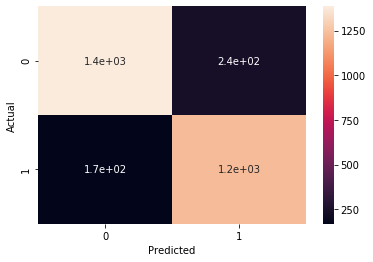

In [56]:
# Get a Confusion Matrix
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1626
           1       0.84      0.88      0.86      1404

    accuracy                           0.87      3030
   macro avg       0.86      0.87      0.87      3030
weighted avg       0.87      0.87      0.87      3030



In [58]:
# Let's predict 2014 results
## Create a temporary data frame for Year 2014 Term J and Term B STEM class
ComtempDf2 = df[['year','term','module_domain','code_module','region','Scotland','East Anglian Region','London Region',
              'South Region','North Western Region','West Midlands Region','South West Region','East Midlands Region',
              'South East Region','Wales','Yorkshire Region','North Region','gender','disability',
              'b4_sum_clicks','half_sum_clicks','std_half_score','date_registration','age_band',
              'module_presentation_length','num_of_prev_attempts','final_result','highest_education',
              'imd_band','studied_credits']]
ComtempDf2 = ComtempDf2.loc[(ComtempDf2.year ==1)]
ComtempDf2.count()

year                          16792
term                          16792
module_domain                 16792
code_module                   16792
region                        16792
Scotland                      16792
East Anglian Region           16792
London Region                 16792
South Region                  16792
North Western Region          16792
West Midlands Region          16792
South West Region             16792
East Midlands Region          16792
South East Region             16792
Wales                         16792
Yorkshire Region              16792
North Region                  16792
gender                        16792
disability                    16792
b4_sum_clicks                 16792
half_sum_clicks               16792
std_half_score                16792
date_registration             16792
age_band                      16792
module_presentation_length    16792
num_of_prev_attempts          16792
final_result                  16792
highest_education           

In [59]:
com2014 = pd.DataFrame(ComtempDf2,columns= ['b4_sum_clicks','half_sum_clicks','std_half_score'])

In [60]:
y_pred_new = regressor.predict(com2014)
y_test_new=ComtempDf2['final_result']

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      9327
           1       0.81      0.86      0.83      7465

    accuracy                           0.85     16792
   macro avg       0.84      0.85      0.85     16792
weighted avg       0.85      0.85      0.85     16792



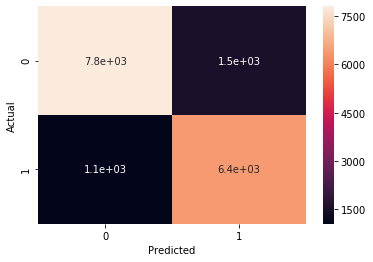

In [62]:
import seaborn as sns
from sklearn import metrics
confusion_matrix = pd.crosstab(y_test_new, y_pred_new, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)